In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
red = pd.read_csv('C:\projects\Wine_Capstone\winequality-red.csv', sep = ';')
white = pd.read_csv('C:\projects\Wine_Capstone\winequality-white.csv', sep = ';')

In [2]:
#Create new column for high quality/ low quality -red
quality_level = []
for row in red['quality']:
    if row >= 6: quality_level.append('high')
    else: quality_level.append('low')
red['quality_level'] = quality_level
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [3]:
y = red.quality_level == 'high'
X = red.drop(['quality_level','quality'],axis=1)
print(y.shape)
print(X.shape)

(1599,)
(1599, 11)


In [4]:
#Scale the data
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [5]:
#KNN Classifier - red
params = {'n_neighbors':np.arange(1,25)}
red_neighbor = KNeighborsClassifier()
red_neighbor_gscv = GridSearchCV(red_neighbor,params,scoring = 'roc_auc',cv=5)
red_neighbor_gscv.fit(X_scaled,y)
print(red_neighbor_gscv.best_params_)
print(red_neighbor_gscv.best_score_)

{'n_neighbors': 24}
0.779947582693962


In [24]:
Xknn_train,Xknn_test,yknn_train,yknn_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_knn=KNeighborsClassifier(n_neighbors=24)
r_knn.fit(Xknn_train,yknn_train)
yknn_pred_r = r_knn.predict_proba(Xknn_test)
yknn_pred_r = yknn_pred_r[:,1]
fpr_knn,tpr_knn,threshold_knn=roc_curve(yknn_test,yknn_pred_r)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)
display_knn=RocCurveDisplay(tpr=tpr_knn,fpr=fpr_knn, roc_auc=roc_auc_knn,estimator_name='K Nearest Neighbor Estimator - Red')



In [7]:
#Random Forest Classifier - red
params = {'n_estimators':[10,100,200,250,300,400,500],'max_depth':[3,6,10,15,20],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'bootstrap':[True, False]}
red_forest=RandomForestClassifier()
red_forest_gscv = GridSearchCV(red_forest,params,scoring = 'roc_auc',cv=5)
red_forest_gscv.fit(X,y)
print(red_forest_gscv.best_params_)
print(red_forest_gscv.best_score_)

{'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
0.8238784881667256


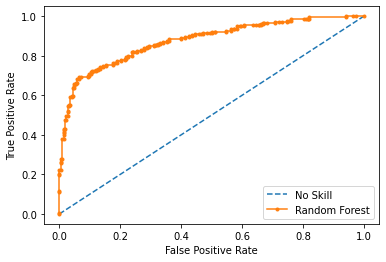

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],linestyle = '--',label='No Skill')
plt.plot(fpr,tpr,marker = '.',label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [11]:
#Logistic Regression
params = {'C':[0.001,0.01,1,10,100],'max_iter':[100,150,200]}
red_lr = LogisticRegression()
red_lr_gscv = GridSearchCV(red_lr,params,scoring = 'roc_auc',cv=5)
red_lr_gscv.fit(X_scaled,y)
print(red_lr_gscv.best_params_)
print(red_lr_gscv.best_score_)

{'C': 1, 'max_iter': 100}
0.808645116327914


In [41]:
Xlr_train,Xlr_test,ylr_train,ylr_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_lr = LogisticRegression(C=1,max_iter=100)
r_lr.fit(Xlr_train,ylr_train)
lr_pred=r_lr.predict_proba(Xlr_test)
lr_pred=lr_pred[:,1]
lr_predict=r_lr.predict(Xlr_test)
fpr_lr,tpr_lr,thresholds_lr=roc_curve(ylr_test,ylr_pred)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)
display_lr=RocCurveDisplay(tpr=tpr_lr,fpr=fpr_lr,roc_auc=roc_auc_lr,estimator_name='Logistic Regression Estimator - Red')
lr_predict.score(ylr_test,lr_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

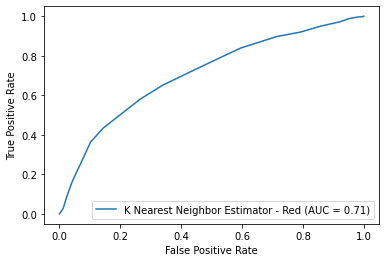

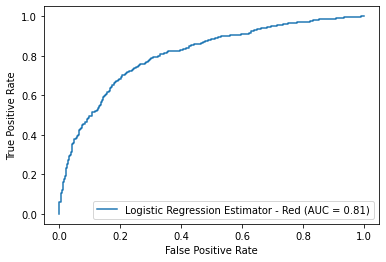

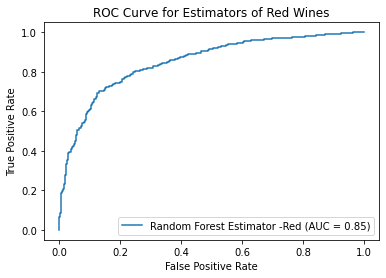

In [38]:
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display_rf=RocCurveDisplay(tpr=tpr,fpr=fpr,roc_auc=roc_auc,estimator_name = 'Random Forest Estimator -Red')
display_knn.plot()
display_lr.plot()
display_rf.plot()
plt.title('ROC Curve for Estimators of Red Wines')
plt.show()

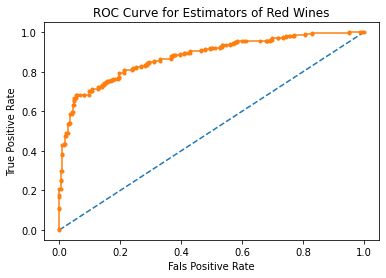

In [14]:
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.xlabel('Fals Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Estimators of Red Wines')
plt.show()

In [15]:
#Create new column for high quality/ low quality -white
quality_level = []
for row in white['quality']:
    if row >= 6: quality_level.append('high')
    else: quality_level.append('low')
white['quality_level'] = quality_level
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,high
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high


In [16]:
y = white.quality_level == 'high'
X = white.drop(['quality_level','quality'], axis=1)
print(y.shape)
print(X.shape)

(4898,)
(4898, 11)


In [17]:
#Scale the data - white
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [18]:
#KNN Classifier - white
params = {'n_neighbors':np.arange(1,25)}
white_neighbor = KNeighborsClassifier()
white_neighbor_gscv = GridSearchCV(white_neighbor,params,scoring = 'roc_auc',cv=5)
white_neighbor_gscv.fit(X_scaled,y)
print(white_neighbor_gscv.best_params_)
print(white_neighbor_gscv.best_score_)

{'n_neighbors': 24}
0.7961682802824325


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
w_knn=KNeighborsClassifier(n_neighbors=24)
w_knn.fit(X_train,y_train)
y_pred_w = w_knn.predict(X_test)
w_knn.score(X_test,y_test)

0.6945578231292517

In [20]:
#Random Forest Classifier - white
params = {'n_estimators':[10,100,200,250,300,400,500],'max_depth':[3,6,10,15,20],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'bootstrap':[True, False]}
white_forest=RandomForestClassifier()
white_forest_gscv = GridSearchCV(white_forest,params,scoring = 'roc_auc',cv=5)
white_forest_gscv.fit(X,y)
print(white_forest_gscv.best_params_)
print(white_forest_gscv.best_score_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
0.8241371471116962


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
w_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
w_rf.fit(X_train,y_train)
w_y_pred=w_rf.predict(X_test)
w_rf.score(X_test,y_test)
RocCurveDisplay.from_predictions = roc_curve(y_test,w_y_pred)
plt.show()

In [22]:
#Logistic Regression - White
params = {'C':[0.001,0.01,1,10,100,500],'max_iter':[100,150,200] }
white_lr = LogisticRegression()
white_lr_gscv = GridSearchCV(white_lr,params,scoring = 'roc_auc',cv=5)
white_lr_gscv.fit(X_scaled,y)
print(white_lr_gscv.best_params_)
print(white_lr_gscv.best_score_)

{'C': 100, 'max_iter': 100}
0.7998574259194007


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_lr = LogisticRegression(C=1,max_iter=100)
w_lr.fit(X_train,y_train)
w_lr.predict(X_test)
w_lr.score(X_test,y_test)

0.753061224489796